<a href="https://colab.research.google.com/github/Olena-24/Science-HW/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time
from sklearn.metrics import classification_report

In [2]:
# Завантаження датасету
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Нормалізація даних
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

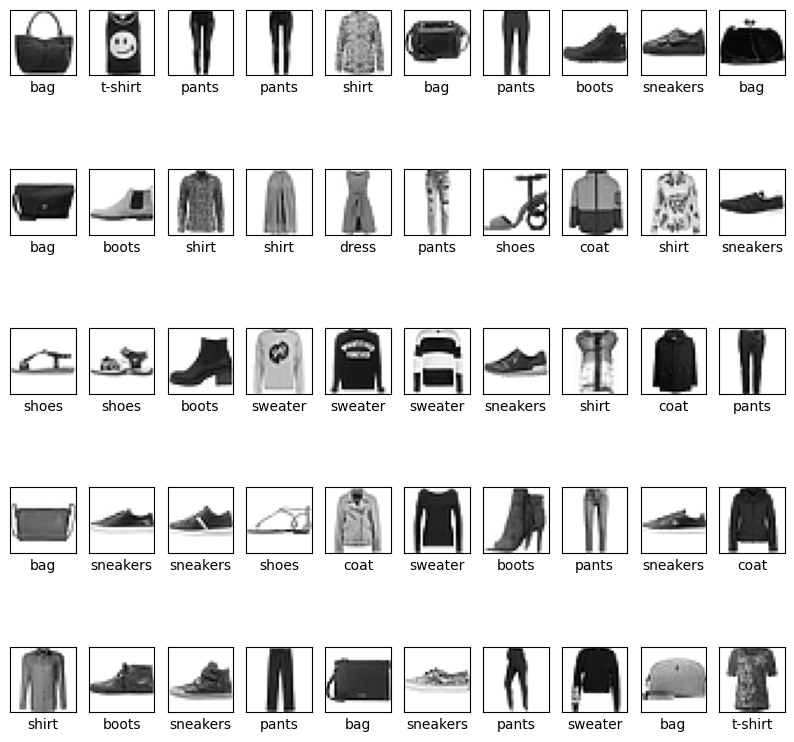

In [ ]:
# Візуалізація даних
classes = [
    "t-shirt", "pants", "sweater", "dress", "coat",
    "shoes", "shirt", "sneakers", "bag", "boots"
]

plt.figure(figsize=(10, 10))
for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()


In [ ]:
# Побудова згорткової нейромережі
def create_cnn_model():
    model = Sequential([
        layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

cnn_model = create_cnn_model()
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Колбеки
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)


In [ ]:
# Вимірювання часу навчання моделі
start_time = time.time()
cnn_history = cnn_model.fit(
    X_train, y_train, epochs=50, batch_size=64,
    validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()
cnn_training_time = end_time - start_time


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 179s 183ms/step - accuracy: 0.7023 - loss: 0.8798 - val_accuracy: 0.8643 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 216s 198ms/step - accuracy: 0.8494 - loss: 0.4091 - val_accuracy: 0.8826 - val_loss: 0.3226 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 170s 181ms/step - accuracy: 0.8716 - loss: 0.3555 - val_accuracy: 0.8855 - val_loss: 0.3052 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 176s 187ms/step - accuracy: 0.8808 - loss: 0.3232 - val_accuracy: 0.8916 - val_loss: 0.3108 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 189ms/step - accuracy: 0.8893 - loss: 0.2996 - val_accuracy: 0.8932 - val_loss: 0.2906 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 176s 188ms/step - accuracy: 0.8981 - loss: 0.2784 - val_accuracy: 0.8830 - val_loss: 0.3282 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 188ms/step - accura

In [ ]:

# Оцінка моделі
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)

# Виведення результатів
print(f"CNN Model training time: {cnn_training_time:.2f} seconds")
print(f"Test accuracy: {cnn_test_accuracy}")
print(f"Test loss: {cnn_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9305 - loss: 0.2094
CNN Model training time: 9673.87 seconds
Test accuracy: 0.9337000250816345
Test loss: 0.19934377074241638


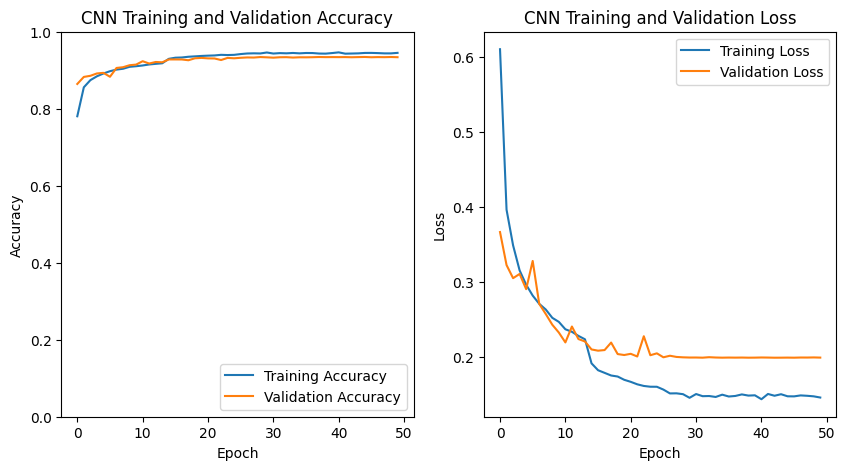

In [ ]:
# Графік точності навчання та валідації
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('CNN Training and Validation Accuracy')
plt.legend(loc='lower right')

# Графік втрат навчання та валідації
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Виведення метрик для CNN
cnn_test_pred = cnn_model.predict(X_test)
cnn_test_pred_classes = np.argmax(cnn_test_pred, axis=1)
cnn_report = classification_report(y_test, cnn_test_pred_classes)
print("Classification report for CNN Model:")
print(cnn_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification report for CNN Model:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       1.00      0.99      0.99      1000
           2       0.90      0.91      0.90      1000
           3       0.93      0.94      0.94      1000
           4       0.90      0.92      0.91      1000
           5       0.99      0.98      0.99      1000
           6       0.81      0.78      0.80      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Висновки.



**Порівняння результатів**

---


Час навчання:
Навчання згорткової нейромережі (CNN) зайняло значно більше часу (9673.87 секунд) порівняно з моделлю LSTM (орієнтовно 553.54 секунд). Пошук гіперпараметрів для LSTM додатково зайняв 3074.15 секунд.

Точність і втрати:
Згорткова нейромережа (CNN) показала кращу точність на тестовому наборі (93.37%) порівняно з моделлю LSTM (83.77%). Втрати на тестовому наборі для CNN були нижчими (0.1993) порівняно з LSTM (0.3679).

**Висновки**


---
Аналіз та висновки:

Час навчання: Згорткова нейромережа (CNN) потребує значно більше часу на навчання, ніж LSTM, але результати показують, що це може бути виправдано кращою точністю.

Точність: CNN модель демонструє найкращі результати за точністю серед усіх моделей.

Втрати: Найменші втрати на тестовому наборі також спостерігаються у CNN моделі, що вказує на її високу ефективність у задачі класифікації.

Отже, для задач класифікації зображень, таких як Fashion MNIST, використання згорткових нейромереж є більш доцільним завдяки їх високій точності та ефективності.








**Частина 2: Використання VGG16 як згорткової основи**


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
# Перетворення зображень у формат RGB (VGG16 очікує 3 канали)
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, -1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, -1))


In [41]:
# Перетворення в float32 і нормалізація даних
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

In [42]:
# Зміна розміру зображень до 32x32 (найменший розмір, який підтримує VGG16)
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

In [43]:
# Завантаження VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [44]:
# Заморожування перших шарів (виділення ознак)
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [45]:
# Створення моделі
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

In [30]:
# Компиляція моделі
vgg_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [46]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Функція для зміни швидкості навчання
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return float(lr * np.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [49]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=30,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[callback])

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7564 - loss: 0.6990 - val_accuracy: 0.8803 - val_loss: 0.3312 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8849 - loss: 0.3173 - val_accuracy: 0.8848 - val_loss: 0.3242 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8966 - loss: 0.2834 - val_accuracy: 0.8827 - val_loss: 0.3310 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9070 - loss: 0.2606 - val_accuracy: 0.8933 - val_loss: 0.2914 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9096 - loss: 0.2422 - val_accuracy: 0.8821 - val_loss: 0.2811 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9148 - loss: 0.2202 - val_accuracy: 0.9050 - val_loss: 0.2684 - learning_rate: 9.0484e-04
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9130 

In [50]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')


313/313 - 3s - 10ms/step - accuracy: 0.9071 - loss: 0.9792

Точність на тестових даних: 0.9071000218391418


In [51]:
# Розморожування всіх шарів для тонкого налаштування
base_model.trainable = True

In [52]:
# Перекомпіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
# Донавчання моделі
history_fine = model.fit(train_images, train_labels, epochs=15,
                         validation_split=0.2,
                         batch_size=64,
                         callbacks=[callback])

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9969 - loss: 0.0051 - val_accuracy: 0.9158 - val_loss: 1.1832 - learning_rate: 1.3534e-04
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9971 - loss: 0.0032 - val_accuracy: 0.9132 - val_loss: 1.2018 - learning_rate: 1.3534e-04
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9979 - loss: 0.0041 - val_accuracy: 0.9151 - val_loss: 1.1250 - learning_rate: 1.3534e-04
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9980 - loss: 0.0022 - val_accuracy: 0.9153 - val_loss: 1.2360 - learning_rate: 1.3534e-04
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9979 - loss: 0.0028 - val_accuracy: 0.9159 - val_loss: 1.1631 - learning_rate: 1.3534e-04
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9987 - loss: 0.0014 - val_accuracy: 0.9155 - val_loss: 1.2547 - learning_rate: 1.2246e-04
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/ste

In [61]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9100 - loss: 1.9562

Точність на тестових даних: 0.9100000262260437


In [62]:
# Функція для побудови графіків
def plot_learning_curves(history, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Графік точності
    ax1.plot(history.history['accuracy'], label='Тренувальна вибірка')
    ax1.plot(history.history['val_accuracy'], label='Валідаційна вибірка')
    ax1.set_title(f'Точність моделі {title_suffix}')
    ax1.set_ylabel('Точність')
    ax1.set_xlabel('Епоха')
    ax1.legend()

    # Графік втрат
    ax2.plot(history.history['loss'], label='Тренувальна вибірка')
    ax2.plot(history.history['val_loss'], label='Валідаційна вибірка')
    ax2.set_title(f'Втрати моделі {title_suffix}')
    ax2.set_ylabel('Втрати')
    ax2.set_xlabel('Епоха')
    ax2.legend()

    plt.tight_layout()
    plt.show()

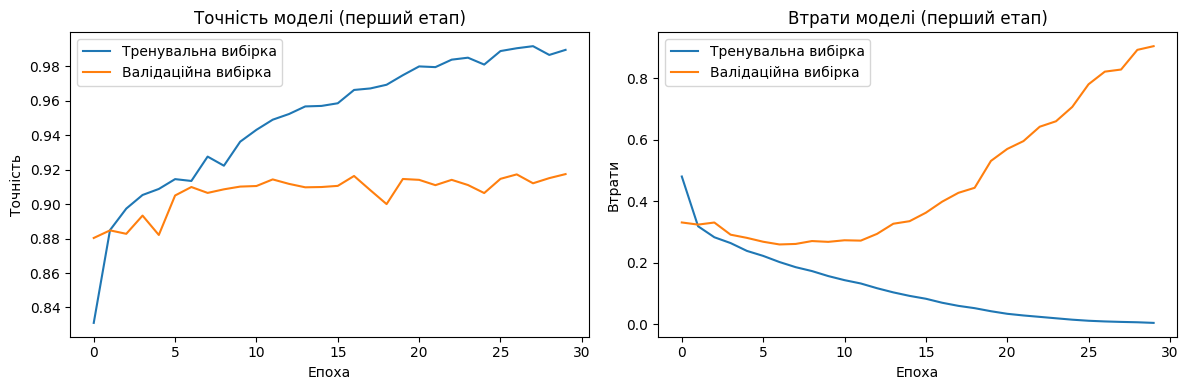

In [63]:
# Побудова графіків для першого етапу навчання
plot_learning_curves(history, "(перший етап)")

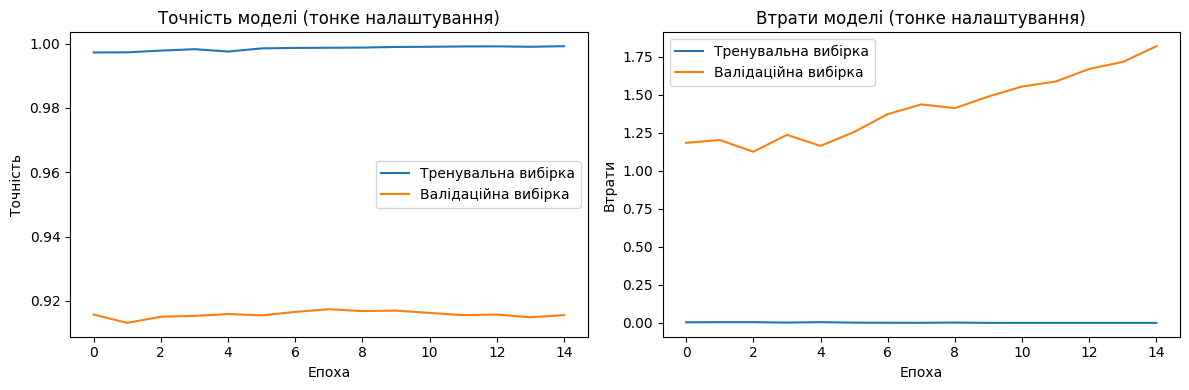

In [64]:
# Побудова графіків для етапу тонкого налаштування
plot_learning_curves(history_fine, "(тонке налаштування)")

Висновки

Точність багатошарової мережі з попереднього завдання склала 0,903. Точність згорткової мережі з використанням VGG16 в якості згорткової основи при аналогічних параметрах склала 0,910 після донавчання та 0,907 до донавчання.